## 讀取薪水數據

In [2]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary.csv', index_col = 0)
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


Populating the interactive namespace from numpy and matplotlib


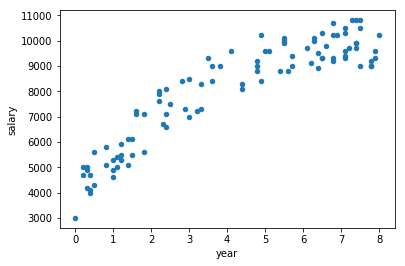

In [3]:
%pylab inline
df.plot(kind = 'scatter',x = 'year', y= 'salary')

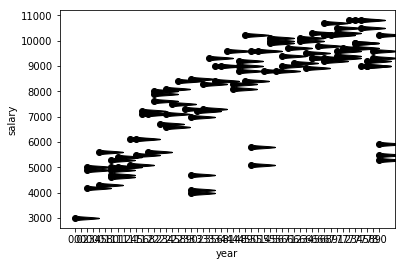

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [4]:
from matplotlib import pyplot as plt
X = df[['year']]
Y = df['salary'].values
plt.scatter(X, Y, color='black')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()
print(type(X))
print(type(Y))

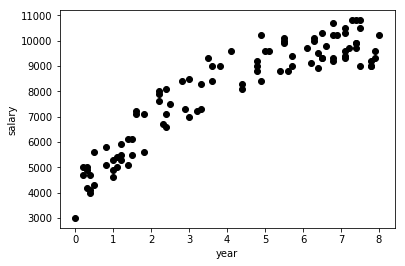

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [5]:
# 注意XY
from matplotlib import pyplot as plt
X = df['year']
Y = df['salary']
plt.scatter(X, Y, color='black')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()
print(type(X))
print(type(Y))

## http://scikit-learn.org/stable/
## http://spark.apache.org/docs/2.0.0/api/python/pyspark.mllib.html
## https://www.tensorflow.org/  深度學習屬於機器學習的一種
## https://keras.io/  tensorflow的接口

## 簡單線性迴歸

In [27]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary.csv', index_col = 0)
df.head()
X = df[['year']]
Y = df['salary'].values

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print('Intercept',regr.intercept_)
print('coefficient', regr.coef_)

Intercept 5049.00989981
coefficient [ 712.59413615]


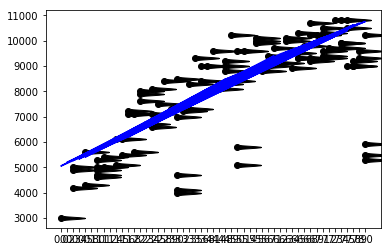

In [29]:
X = df[['year']]
Y = df['salary'].values
plt.scatter(X, Y, color='black')
plt.plot(X, regr.predict(X), color="blue")
plt.show()

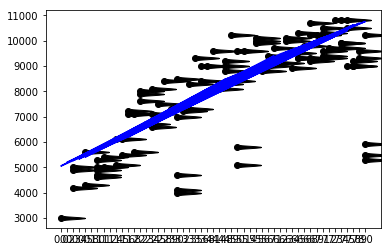

In [32]:
X = df[['year']]
Y = df['salary']
plt.scatter(X, Y, color='black')
plt.plot(X, regr.predict(X), color="BLUE")
plt.show()


In [33]:
X

,year
1,2.4
2,5.5
3,3.3
4,0.2
5,1.5
6,7.4
7,7.8
8,5.6
9,2.8
10,6.2


In [37]:
#X = df[['year']]
regr.predict(X)

array([  6759.23582656,   8968.27764861,   7400.57054909,   5191.52872704,
         6117.90110403,  10322.20650729,  10607.24416175,   9039.53706223,
         7044.27348102,   9467.09354391,  10322.20650729,   6759.23582656,
         6046.64169042,   9680.87178476,   8184.42409885,   7970.64585801,
         8540.72116693,   9609.61237114,  10108.42826645,   9538.35295753,
         7186.79230825,   5832.86344957,  10322.20650729,   5832.86344957,
         7543.08937632,   5191.52872704,   6616.71699933,   6687.97641295,
        10607.24416175,   6830.49524018,   5761.60403596,   5334.04755427,
         7756.86761717,   6189.16051765,   5262.78814066,   8611.98058054,
         5904.12286319,   5761.60403596,   5761.60403596,   9609.61237114,
         9538.35295753,  10108.42826645,  10393.4659209 ,   8469.46175331,
         5262.78814066,   5262.78814066,   5049.00989981,   9395.8341303 ,
         8968.27764861,   5619.08520873,   8469.46175331,   5334.04755427,
        10607.24416175,  

In [38]:
salaries = pandas.DataFrame([{'year': 6}, {'year': 8}])
print(salaries)
print(regr.predict(salaries))

#Intercept 5049.00989981
#coefficient [ 712.59413615]
712.59413615 * 6 + 5049.00989981

   year
0     6
1     8
[  9324.57471669  10749.76298898]


9324.574716710002

## 把模型存下來
- http://scikit-learn.org/stable/modules/model_persistence.html

In [41]:
from sklearn.externals import joblib
joblib.dump(regr, 'regression.pkl') 

['regression.pkl']

In [42]:
clf = joblib.load('regression.pkl') 

In [43]:
salaries = pandas.DataFrame([{'year': 6}, {'year': 8}])
print(clf.predict(salaries))

[  9324.57471669  10749.76298898]


## 多項式線性迴歸

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 2)
X_ = poly_reg.fit_transform(X)

regr = LinearRegression()
regr.fit(X_,Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

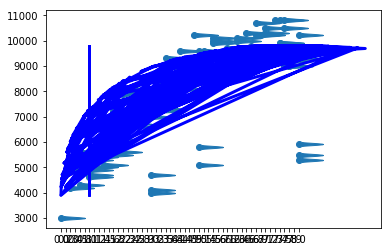

In [46]:
plt.scatter(X,Y)
plt.plot(X_, regr.predict(X_), color = 'blue', linewidth = 3)
plt.show()

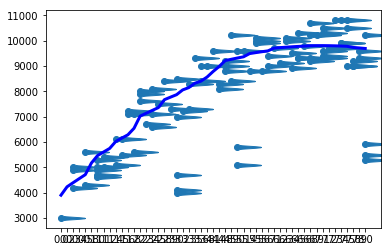

In [47]:
X2  = X.sort_values('year')
X2_ = poly_reg.fit_transform(X2)

plt.scatter(X,Y)
plt.plot(X2, regr.predict(X2_), color = 'blue', linewidth = 3)
plt.show()

## 多元迴歸模型
- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/house-prices.csv')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [11]:
dummy_brick    = pandas.get_dummies(df['Brick'])
print(dummy_brick.head())

   No  Yes
0   1    0
1   1    0
2   1    0
3   1    0
4   1    0


In [12]:
dummy_neighbor = pandas.get_dummies(df['Neighborhood'])
print(dummy_neighbor.head())

   East  North  West
0     1      0     0
1     1      0     0
2     1      0     0
3     1      0     0
4     1      0     0


In [2]:
dummy_brick    = pandas.get_dummies(df['Brick'])
dummy_neighbor = pandas.get_dummies(df['Neighborhood'])

house = pandas.concat([df, dummy_brick, dummy_neighbor], axis = 1)

In [3]:
del house['No']
del house['West']
del house['Brick']
del house['Neighborhood']
del house['Home']

In [40]:
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Yes,East,North
0,114300,1790,2,2,2,0,1,0
1,114200,2030,4,2,3,0,1,0
2,114800,1740,3,2,1,0,1,0
3,94700,1980,3,2,3,0,1,0
4,119800,2130,3,3,3,0,1,0


In [7]:
X = house[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East','North']]
print(X.head())
print(type(X))

   SqFt  Bedrooms  Bathrooms  Offers  Yes  East  North
0  1790         2          2       2    0     1      0
1  2030         4          2       3    0     1      0
2  1740         3          2       1    0     1      0
3  1980         3          2       3    0     1      0
4  2130         3          3       3    0     1      0
<class 'pandas.core.frame.DataFrame'>


In [9]:
Y = house['Price'].values
print(Y)
print(type(Y))

[114300 114200 114800  94700 119800 114600 151600 150700 119200 104000
 132500 123000 102600 126300 176800 145800 147100  83600 111400 167200
 116200 113800  91700 106100 156400 149300 137000  99300  69100 188000
 182000 112300 135000 139600 117800 117100 117500 147000 131300 108200
 106600 133600 105600 154000 166500 103200 129800  90300 115900 107500
 151100  91100 117400 130800  81300 125700 140900 152300 138100 155400
 180900 100900 161300 120500 130300 111100 126200 151900  93600 165600
 166700 157600 107300 125700 144200 106900 129800 176500 121300 143600
 143400 184300 164800 147700  90500 188300 102700 172500 127700  97800
 143100 116500 142600 157100 160600 152500 133300 126800 145500 171000
 103200 123100 136800 211200  82300 146900 108500 134000 117000 108700
 111600 114900 123600 115700 124500 102500 199500 117800 150200 109700
 110400 105600 144800 119700 147900 113500 149900 124600]
<class 'numpy.ndarray'>


In [13]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

X = house[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East','North']]
Y = house['Price'].values

regr.fit(X,Y)
regr.predict(X)


array([ 103182.88325028,  116127.48050967,  113047.47841973,
        109230.99957752,  125063.33919194,  108460.31885328,
        148704.1829466 ,  153525.7716034 ,  120366.97977446,
        103865.84286795,  129178.03614553,  124719.73204259,
         98814.52852196,  128446.1660185 ,  167661.38200801,
        141655.63841392,  137272.82484975,  110937.30627969,
        123978.2844232 ,  161741.1079378 ,   99162.18882362,
        103583.96519486,   95423.39386208,  119609.92969489,
        159114.47019421,  139349.71073264,  136779.2847555 ,
        102660.24046903,   86407.16329753,  180614.63904496,
        175208.34797844,  129459.93561064,  148719.93761665,
        150535.84930595,  107604.65962152,  123974.23127089,
        109512.89904262,  158652.44607031,  134229.22007367,
        106340.56922088,   99261.81118229,  144451.05303714,
        105514.14309396,  139883.70129304,  162800.982754  ,
        100222.06363982,  123225.48902465,   89698.67559875,
        113251.69400417,

In [14]:
type(regr.predict(X))

numpy.ndarray

## 評估迴歸模型

In [15]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sat, 10 Feb 2018   Prob (F-statistic):           8.25e-50
Time:                        16:30:50   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.284e+04   1.02e+04      2.231      0.0

In [18]:
predictorcols = X.columns
predictorcols

Index(['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'], dtype='object')

In [19]:
import itertools
for rec in itertools.combinations(predictorcols, 2):
    print(rec)

('SqFt', 'Bedrooms')
('SqFt', 'Bathrooms')
('SqFt', 'Offers')
('SqFt', 'Yes')
('SqFt', 'East')
('SqFt', 'North')
('Bedrooms', 'Bathrooms')
('Bedrooms', 'Offers')
('Bedrooms', 'Yes')
('Bedrooms', 'East')
('Bedrooms', 'North')
('Bathrooms', 'Offers')
('Bathrooms', 'Yes')
('Bathrooms', 'East')
('Bathrooms', 'North')
('Offers', 'Yes')
('Offers', 'East')
('Offers', 'North')
('Yes', 'East')
('Yes', 'North')
('East', 'North')


## 根據AIC 選擇變數

In [20]:
for k in range(1, len(predictorcols) + 1):
    for variables in itertools.combinations(predictorcols, k):
        print(variables)

('SqFt',)
('Bedrooms',)
('Bathrooms',)
('Offers',)
('Yes',)
('East',)
('North',)
('SqFt', 'Bedrooms')
('SqFt', 'Bathrooms')
('SqFt', 'Offers')
('SqFt', 'Yes')
('SqFt', 'East')
('SqFt', 'North')
('Bedrooms', 'Bathrooms')
('Bedrooms', 'Offers')
('Bedrooms', 'Yes')
('Bedrooms', 'East')
('Bedrooms', 'North')
('Bathrooms', 'Offers')
('Bathrooms', 'Yes')
('Bathrooms', 'East')
('Bathrooms', 'North')
('Offers', 'Yes')
('Offers', 'East')
('Offers', 'North')
('Yes', 'East')
('Yes', 'North')
('East', 'North')
('SqFt', 'Bedrooms', 'Bathrooms')
('SqFt', 'Bedrooms', 'Offers')
('SqFt', 'Bedrooms', 'Yes')
('SqFt', 'Bedrooms', 'East')
('SqFt', 'Bedrooms', 'North')
('SqFt', 'Bathrooms', 'Offers')
('SqFt', 'Bathrooms', 'Yes')
('SqFt', 'Bathrooms', 'East')
('SqFt', 'Bathrooms', 'North')
('SqFt', 'Offers', 'Yes')
('SqFt', 'Offers', 'East')
('SqFt', 'Offers', 'North')
('SqFt', 'Yes', 'East')
('SqFt', 'Yes', 'North')
('SqFt', 'East', 'North')
('Bedrooms', 'Bathrooms', 'Offers')
('Bedrooms', 'Bathrooms', 'Yes

In [31]:
for k in range(1, len(predictorcols) + 1):
    for variables in itertools.combinations(predictorcols, k):
        #print(variables)
        predictors = X[list(variables)]
        X2 = sm.add_constant(predictors)
        est = sm.OLS(Y, X2)
        res = est.fit()
        print(variables,res.aic)

('SqFt',) 2930.39922128
('Bedrooms',) 2935.6714585
('Bathrooms',) 2936.16585745
('Offers',) 2963.86246815
('Yes',) 2947.74482679
('East',) 2974.47357375
('North',) 2931.36230664
('SqFt', 'Bedrooms') 2915.22453448
('SqFt', 'Bathrooms') 2917.66849032
('SqFt', 'Offers') 2865.69424753
('SqFt', 'Yes') 2896.90935927
('SqFt', 'East') 2927.06242688
('SqFt', 'North') 2897.74565417
('Bedrooms', 'Bathrooms') 2916.03568995
('Bedrooms', 'Offers') 2909.80509568
('Bedrooms', 'Yes') 2900.11644902
('Bedrooms', 'East') 2936.06089861
('Bedrooms', 'North') 2908.69923728
('Bathrooms', 'Offers') 2907.56524354
('Bathrooms', 'Yes') 2911.69774342
('Bathrooms', 'East') 2934.54568996
('Bathrooms', 'North') 2902.50974727
('Offers', 'Yes') 2939.20844689
('Offers', 'East') 2962.72006419
('Offers', 'North') 2929.77580646
('Yes', 'East') 2942.28829217
('Yes', 'North') 2912.95432308
('East', 'North') 2872.58005636
('SqFt', 'Bedrooms', 'Bathrooms') 2907.0008159
('SqFt', 'Bedrooms', 'Offers') 2843.92957679
('SqFt', 'Bed

In [30]:
predictors = X[list(variables)]
print(predictors.head())
print(type(predictors))

   SqFt  Bedrooms  Bathrooms  Offers  Yes  East  North
0  1790         2          2       2    0     1      0
1  2030         4          2       3    0     1      0
2  1740         3          2       1    0     1      0
3  1980         3          2       3    0     1      0
4  2130         3          3       3    0     1      0
<class 'pandas.core.frame.DataFrame'>


In [32]:
AICs = {}
for k in range(1, len(predictorcols) + 1):
    for variables in itertools.combinations(predictorcols, k):
        #print(variables)
        predictors = X[list(variables)]
        X2 = sm.add_constant(predictors)
        est = sm.OLS(Y, X2)
        res = est.fit()
        AICs[variables] = res.aic

In [34]:
AICs

{('Bathrooms',): 2936.1658574541634,
 ('Bathrooms', 'East'): 2934.5456899603382,
 ('Bathrooms', 'East', 'North'): 2845.2816438971668,
 ('Bathrooms', 'North'): 2902.5097472661846,
 ('Bathrooms', 'Offers'): 2907.5652435435345,
 ('Bathrooms', 'Offers', 'East'): 2904.5344416559515,
 ('Bathrooms', 'Offers', 'East', 'North'): 2840.4614473213255,
 ('Bathrooms', 'Offers', 'North'): 2889.2960833821353,
 ('Bathrooms', 'Offers', 'Yes'): 2886.9093972165865,
 ('Bathrooms', 'Offers', 'Yes', 'East'): 2878.1843633318936,
 ('Bathrooms', 'Offers', 'Yes', 'East', 'North'): 2806.8477640418009,
 ('Bathrooms', 'Offers', 'Yes', 'North'): 2872.4714484791889,
 ('Bathrooms', 'Yes'): 2911.6977434155101,
 ('Bathrooms', 'Yes', 'East'): 2904.7369177724572,
 ('Bathrooms', 'Yes', 'East', 'North'): 2810.1768745921358,
 ('Bathrooms', 'Yes', 'North'): 2884.6660307057455,
 ('Bedrooms',): 2935.671458496874,
 ('Bedrooms', 'Bathrooms'): 2916.0356899473968,
 ('Bedrooms', 'Bathrooms', 'East'): 2915.5305048339142,
 ('Bedrooms'

In [36]:
from collections import Counter
c = Counter(AICs)
c.most_common() #AIC由大排到小

[(('East',), 2974.473573747804),
 (('Offers',), 2963.862468153879),
 (('Offers', 'East'), 2962.7200641863878),
 (('Yes',), 2947.7448267850759),
 (('Yes', 'East'), 2942.28829217051),
 (('Offers', 'Yes'), 2939.2084468923699),
 (('Bathrooms',), 2936.1658574541634),
 (('Bedrooms', 'East'), 2936.0608986117104),
 (('Bedrooms',), 2935.671458496874),
 (('Bathrooms', 'East'), 2934.5456899603382),
 (('Offers', 'Yes', 'East'), 2933.2079284001748),
 (('North',), 2931.3623066402315),
 (('SqFt',), 2930.3992212782641),
 (('Offers', 'North'), 2929.7758064583909),
 (('SqFt', 'East'), 2927.0624268771817),
 (('SqFt', 'Bathrooms'), 2917.6684903192145),
 (('Bedrooms', 'Bathrooms'), 2916.0356899473968),
 (('Bedrooms', 'Bathrooms', 'East'), 2915.5305048339142),
 (('SqFt', 'Bedrooms'), 2915.2245344840526),
 (('SqFt', 'Bathrooms', 'East'), 2914.2361942869252),
 (('SqFt', 'Bedrooms', 'East'), 2913.5512313749327),
 (('Yes', 'North'), 2912.9543230827662),
 (('Offers', 'Yes', 'North'), 2911.8924981689534),
 (('Bat

In [38]:
type(c.most_common())

list

In [37]:
from collections import Counter
c = Counter(AICs)
c.most_common()[-1]#AIC最小

(('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'),
 2729.3189814012494)

## 決策樹

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [3]:
type(iris.data)

numpy.ndarray

In [4]:
iris.data.ndim

2

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.data[0:2,]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2]])

In [7]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [8]:
iris.data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [9]:
iris.target[0:5]

array([0, 0, 0, 0, 0])

In [10]:
type(iris.target)

numpy.ndarray

In [62]:
iris.target.shape

(150,)

In [89]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
predicted  = clf.predict(iris.data)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [90]:
from sklearn import tree
tree.export_graphviz(clf, 'tree.dot')

In [91]:
! dir

 磁碟區 C 中的磁碟沒有標籤。
 磁碟區序號:  C4A1-A3CB

 C:\Users\user\tibamepy 的目錄

2018/02/10  下午 08:35    <DIR>          .
2018/02/10  下午 08:35    <DIR>          ..
2018/02/10  下午 06:20    <DIR>          .ipynb_checkpoints
2018/01/28  下午 05:08            26,523 123.html
2018/01/08  下午 11:58            68,306 appledaily.xlsx
2018/01/29  下午 11:22         8,300,544 chromedriver.exe
2018/02/10  下午 06:16             2,641 cmpy.jpg
2018/01/07  下午 09:25    <DIR>          data
2018/01/07  下午 08:11           319,476 Demo20170812.ipynb
2018/02/10  下午 06:08           413,681 Demo20170813.ipynb
2018/02/03  下午 08:20         1,164,011 Demo20170819.ipynb
2018/02/04  下午 11:30           991,636 Demo20170820.ipynb
2018/02/10  下午 08:33           782,807 Demo20170902.ipynb
2018/01/28  下午 06:43           453,017 Demo20170903.ipynb
2018/01/14  下午 08:05                 0 example.json
2018/02/03  下午 11:03                 0 house.sqlite
2018/01/14  下午 08:05                 0 new-record.json
2018/02/10  下午 05:58             1,

In [92]:
iris.data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

##  安裝Graphviz
### https://graphviz.gitlab.io/_pages/Download/Download_windows.html
### 將C:\Program Files (x86)\Graphviz2.38\bin加入環境變數PATH中
### 切換到 tree.dot 的路徑下,開啟命令提示字元 dot –Tpng tree.dot –o tree.png 

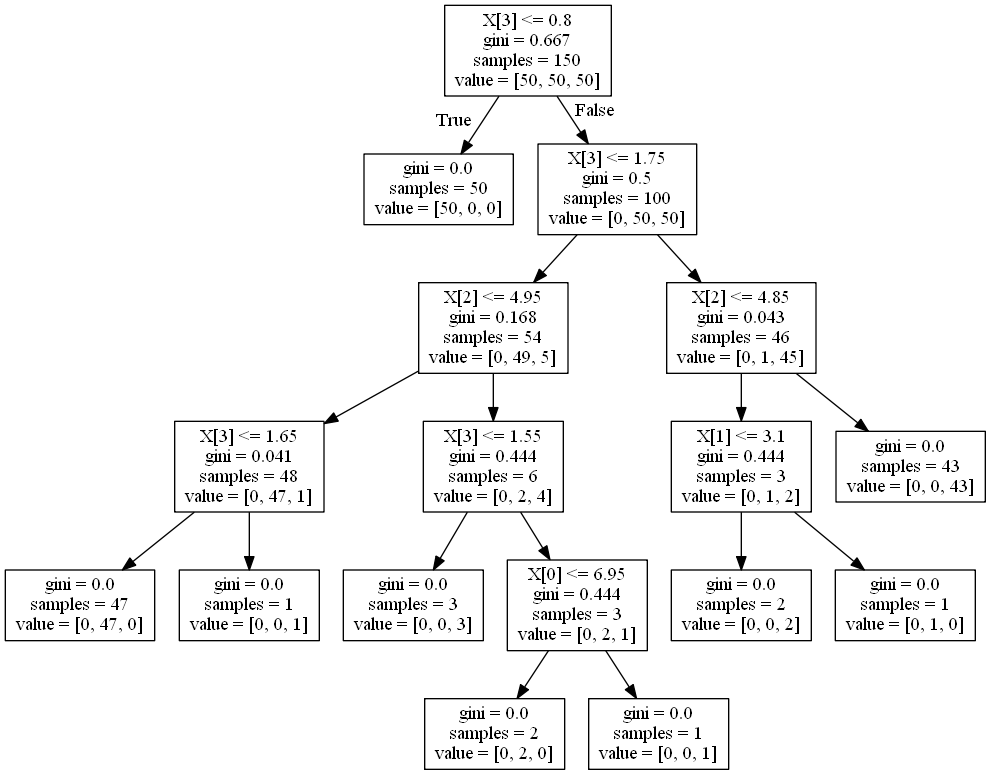

In [94]:
from PIL import Image
Image.open('tree.png')

In [95]:
from sklearn import tree
clf2 = tree.DecisionTreeClassifier(max_depth= 2)
clf2.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [96]:
from sklearn import tree
tree.export_graphviz(clf2, 'tree2.dot')

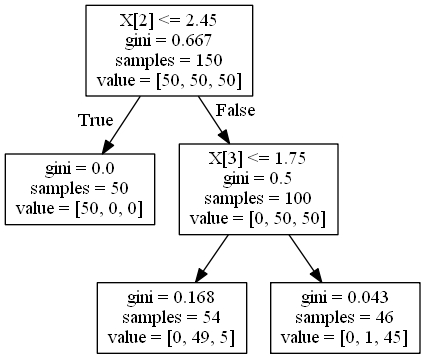

In [97]:
from PIL import Image
Image.open('tree2.png')

## 繪製決策邊界

In [98]:
from sklearn. datasets import load_iris
from sklearn import tree

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

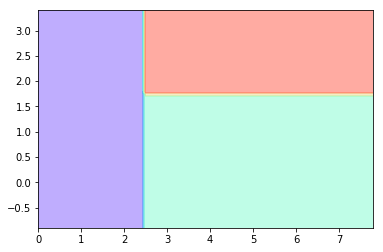

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# 繪製決策邊界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

plt.plot()
plt.show()

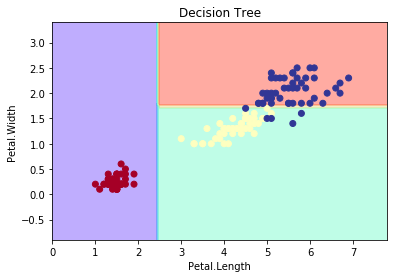

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# 繪製決策邊界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

plt.plot()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)

# 繪製資料點
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)

# 加上圖標
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()


In [101]:
xx

array([[ 0. ,  0.1,  0.2, ...,  7.6,  7.7,  7.8],
       [ 0. ,  0.1,  0.2, ...,  7.6,  7.7,  7.8],
       [ 0. ,  0.1,  0.2, ...,  7.6,  7.7,  7.8],
       ..., 
       [ 0. ,  0.1,  0.2, ...,  7.6,  7.7,  7.8],
       [ 0. ,  0.1,  0.2, ...,  7.6,  7.7,  7.8],
       [ 0. ,  0.1,  0.2, ...,  7.6,  7.7,  7.8]])

In [102]:
yy

array([[-0.9, -0.9, -0.9, ..., -0.9, -0.9, -0.9],
       [-0.8, -0.8, -0.8, ..., -0.8, -0.8, -0.8],
       [-0.7, -0.7, -0.7, ..., -0.7, -0.7, -0.7],
       ..., 
       [ 3.2,  3.2,  3.2, ...,  3.2,  3.2,  3.2],
       [ 3.3,  3.3,  3.3, ...,  3.3,  3.3,  3.3],
       [ 3.4,  3.4,  3.4, ...,  3.4,  3.4,  3.4]])

In [104]:
Z

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ..., 
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

## 邏輯式(Logit)迴歸

In [108]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
clf = LogisticRegression()
X = iris.data[:,[2,3]]
Y = iris.target
clf.fit(X, Y)

clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

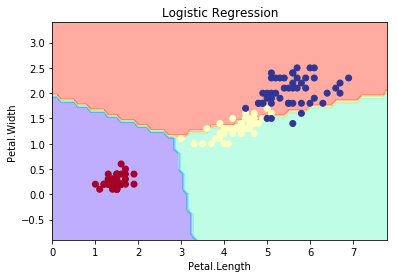

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# 繪製決策邊界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

plt.plot()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)

# 繪製資料點
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)

# 加上圖標
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()


## 建立 SVM

In [110]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
iris = load_iris()

X = iris.data[0:100,[2,3]]
y = iris.target[0:100]

clf1 = SVC(kernel="linear")
clf1.fit(X, y)

clf2 = LogisticRegression()
clf2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
def plot_estimator(estimator, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.plot()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()

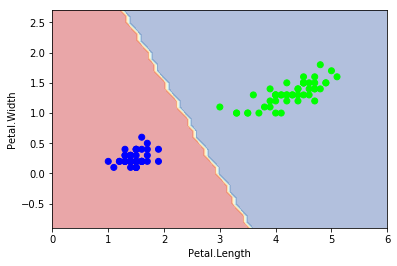

In [112]:
plot_estimator(clf1, X, y)

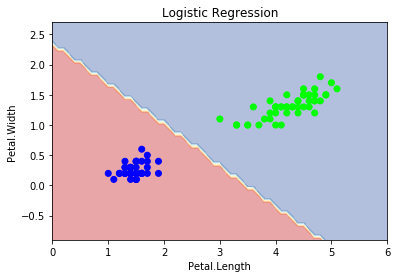

In [115]:
plot_estimator(clf2, X, y)

## 比較不同的Regluarization Term

In [129]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1], [1,1,1], [-0.4,0.5,1],[2,5,1]])
print(data)
print(type(data))
X = data[:, :2]
print(X)
print(type(X))
print(X.shape)

[[-1.   2.   0. ]
 [-2.   3.   0. ]
 [-2.   5.   0. ]
 [-3.  -4.   0. ]
 [-0.1  2.   0. ]
 [ 0.2  1.   1. ]
 [ 0.   1.   1. ]
 [ 1.   2.   1. ]
 [ 1.   1.   1. ]
 [-0.4  0.5  1. ]
 [ 2.   5.   1. ]]
<class 'numpy.ndarray'>
[[-1.   2. ]
 [-2.   3. ]
 [-2.   5. ]
 [-3.  -4. ]
 [-0.1  2. ]
 [ 0.2  1. ]
 [ 0.   1. ]
 [ 1.   2. ]
 [ 1.   1. ]
 [-0.4  0.5]
 [ 2.   5. ]]
<class 'numpy.ndarray'>
(11, 2)


In [126]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1], [1,1,1], [-0.4,0.5,1],[2,5,1]])
Y = data[:,2]
print(Y)
print(type(Y))
print(Y.shape)

[ 0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.]
<class 'numpy.ndarray'>
(11,)


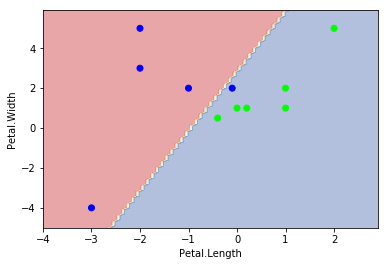

In [130]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1], [1,1,1], [-0.4,0.5,1],[2,5,1]])
X = data[:, :2] 
Y = data[:,2]

# Wide Margin 寬邊界 小C
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)


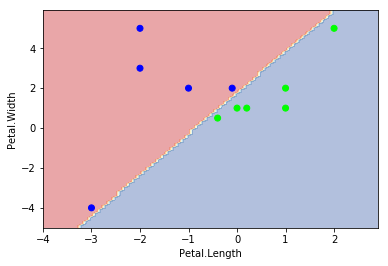

In [131]:
# Narrow Margin 宰邊界 大C
clf = SVC(C=100000, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

## 比較不同Kernal Function

In [138]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [139]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Populating the interactive namespace from numpy and matplotlib


C:\Users\user\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'product', 'title', 'rec', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


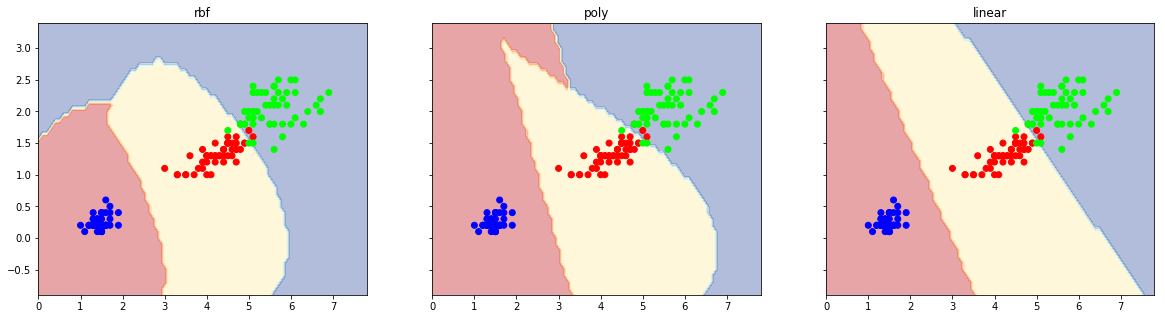

In [141]:
%pylab inline

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    axarr[idx].set_title(title)


## 隨機森林 (Random Forest)

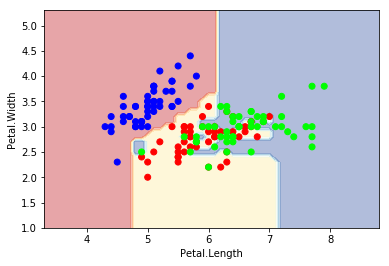

In [142]:
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
X = iris.data[:,[0,1]]
y = iris.target

clf = RandomForestClassifier(n_estimators=100, criterion="entropy")
clf.fit(X, y)
plot_estimator(clf, X, y)

In [143]:
clf1 = RandomForestClassifier(n_estimators=1, criterion="entropy")
clf1.fit(X, y)

clf10 = RandomForestClassifier(n_estimators=10, criterion="entropy")
clf10.fit(X, y)

clf100 = RandomForestClassifier(n_estimators=100, criterion="entropy")
clf100.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

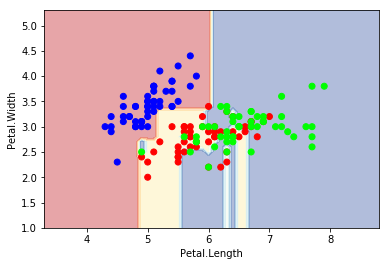

In [144]:
plot_estimator(clf1, X, y)

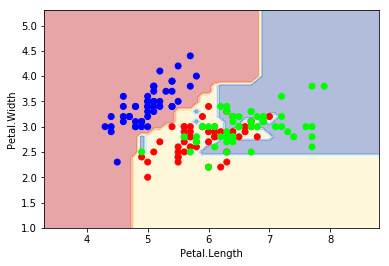

In [145]:
plot_estimator(clf10, X, y)

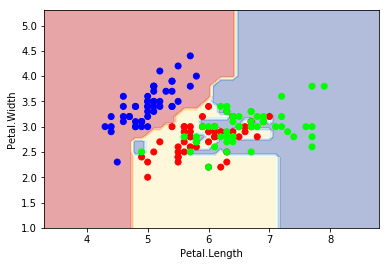

In [146]:
plot_estimator(clf100, X, y)

## 比較不同分類器

In [147]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = DecisionTreeClassifier()
clf2.fit(X, y)

clf3 = RandomForestClassifier(n_estimators=10, criterion="entropy")
clf3.fit(X, y)

clf4 = LogisticRegression()
clf4.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

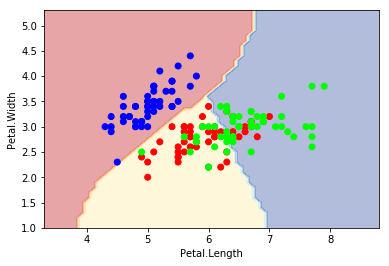

In [148]:
plot_estimator(clf1, X, y) #clf1 = SVC(kernel="rbf")

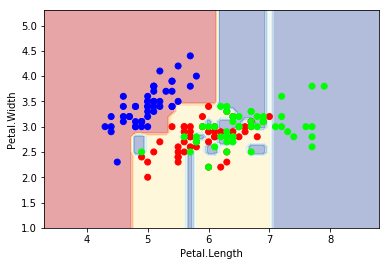

In [149]:
plot_estimator(clf2, X, y) #clf2 = DecisionTreeClassifier()

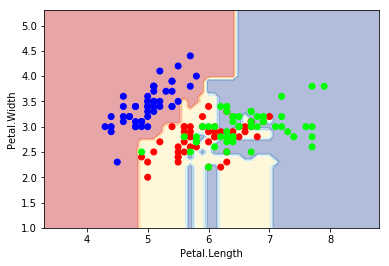

In [150]:
plot_estimator(clf3, X, y)  #clf3 = RandomForestClassifier(n_estimators=10, criterion="entropy")

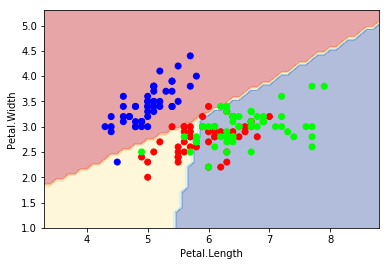

In [151]:
plot_estimator(clf4, X, y) #clf4 = LogisticRegression()

## 類神經網路

In [209]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()

In [210]:
type(digits)

sklearn.utils.Bunch

In [211]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [212]:
type(digits.data)

numpy.ndarray

In [213]:
digits.data.shape

(1797, 64)

In [214]:
 digits.data.ndim

2

In [215]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

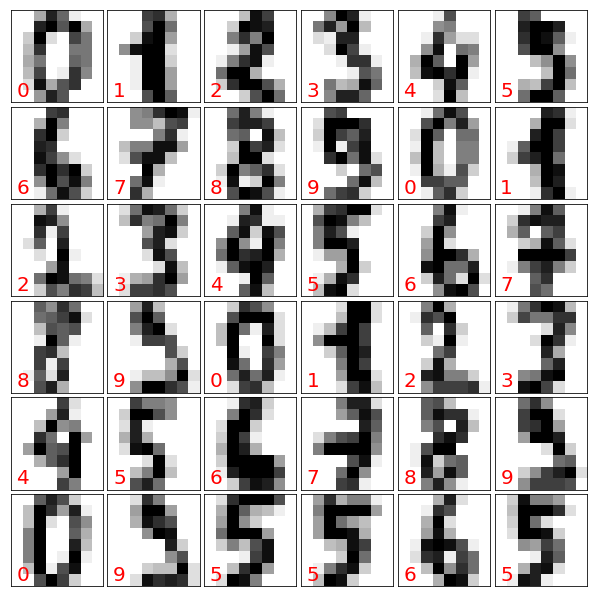

In [216]:
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]), color="red", fontsize = 20)

In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(digits.data)
X_scaled = scaler.transform(digits.data)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ..., 
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [218]:
type(X_scaled)

numpy.ndarray

In [219]:
X_scaled.shape

(1797, 64)

In [220]:
X_scaled.ndim

2

In [221]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='logistic', max_iter = 1000)
mlp.fit(X_scaled,digits.target)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

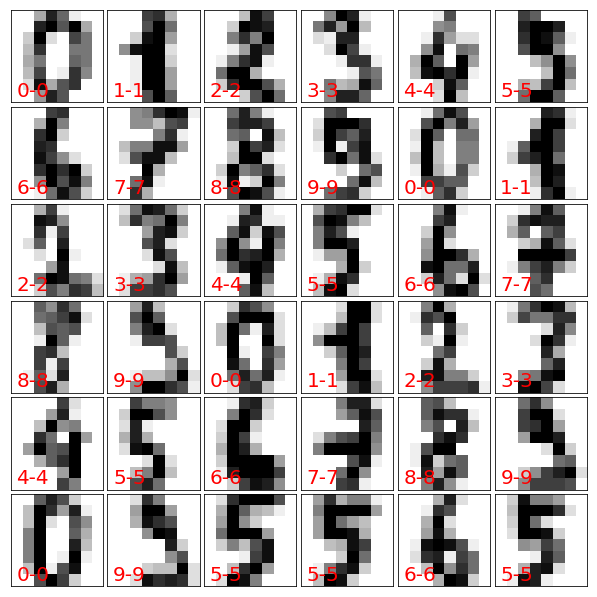

In [222]:
predicted = mlp.predict(X_scaled)
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str('{}-{}'.format(digits.target[i],predicted[i])), color="red", fontsize = 20)


In [223]:
digits.target #實際結果

array([0, 1, 2, ..., 8, 9, 8])

In [224]:
digits.target.shape

(1797,)

In [225]:
predicted #預測結果

array([0, 1, 2, ..., 8, 9, 8])

In [226]:
predicted.shape

(1797,)

In [227]:
digits.target == predicted

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [228]:
sum(digits.target == predicted)

1797

In [229]:
len(digits.target)

1797

In [230]:
sum(digits.target == predicted) / len(digits.target)

1.0